In [73]:
from clickhouse_connect import get_client
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt

# Set up client
client = get_client(
    host='localhost',
    port=8123,
    username='default',
    password='mysecurepassword'
)

# Define time range
one_hour_ago = datetime.utcnow() - timedelta(hours=1)
query = f"""
SELECT
    timestamp,
    price,
    volume
FROM price_ticks
WHERE timestamp >= toDateTime('{one_hour_ago.strftime('%Y-%m-%d %H:%M:%S')}')
ORDER BY timestamp ASC
"""

# Run query and convert to DataFrame
result = client.query(query)
df = pd.DataFrame(result.result_rows, columns=['timestamp', 'price', 'volume'])

# Show the first few rows
df.head()


Unexpected Http Driver Exception


OperationalError: Error HTTPConnectionPool(host='localhost', port=8123): Max retries exceeded with url: /? (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x000001A5C85DA000>: Failed to establish a new connection: [WinError 10061] No connection could be made because the target machine actively refused it')) executing HTTP request attempt 1 (http://localhost:8123)

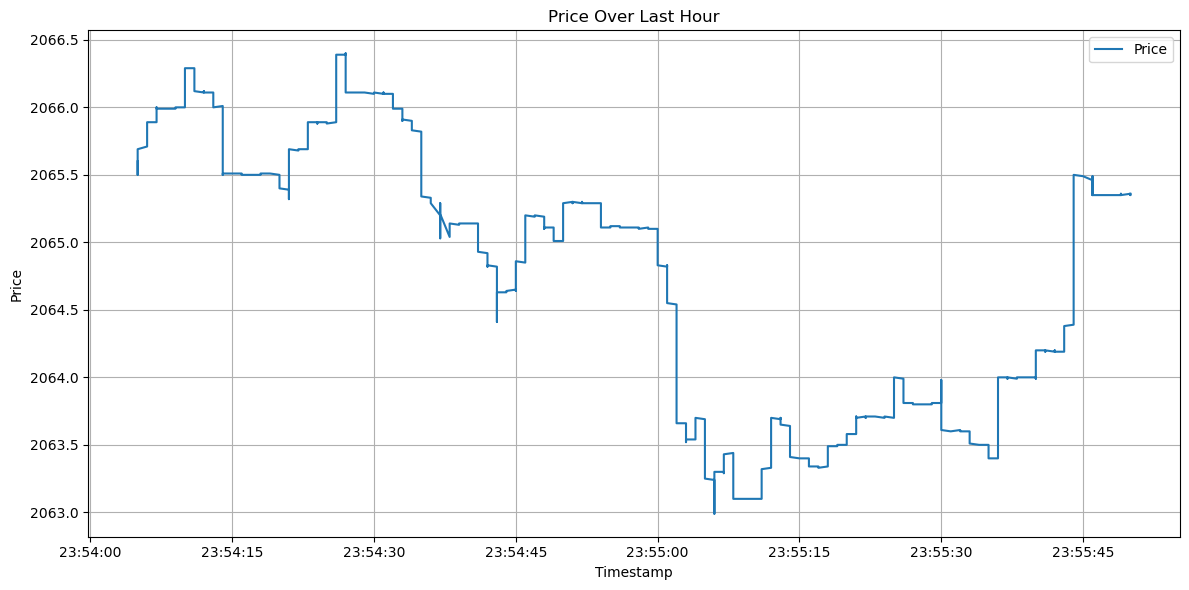

In [ ]:
# Ensure timestamp is datetime type
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Plot price over time
plt.figure(figsize=(12, 6))
plt.plot(df['timestamp'], df['price'], label='Price')
plt.title('Price Over Last Hour')
plt.xlabel('Timestamp')
plt.ylabel('Price')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
len(df)  # Display the number of rows in the DataFrame

4888